## Burgers' Equation

Here we solve the burgers equation $u_t + uu_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

In [6]:
#Define the domain
L = 10.0                    #Domain length
nx = 201                    #Number of grid points
dx = L / (nx - 1)           #Grid spacing
x = np.linspace(0, L, nx)   #Grid 

#Define the initial condition
x0 = 5
u_initial = 10*np.exp(-(x - x0)**2)

#Define the time step and the final time
cf = 0.25                    #Courant Factor
t_final = 0.5

# Time step -> For Burgers Equation is dependent on the maximum value of u, which leads to smaller time steps
dt = cf*dx/np.max(u_initial)

print('Domain Length = ', L)
print('Grid Points = ', nx)
print('Grid resolution dx = ', dx)
print('Time resolution dt = ', dt)
print('Time of evolution  = ', t_final)
print('Number of iterations = ', t_final/dt)

#We create 2 arrays where we will store the time and the l2norm
l2norm = []
time = []

Domain Length =  10.0
Grid Points =  201
Grid resolution dx =  0.05
Time resolution dt =  0.00125
Time of evolution  =  0.5
Number of iterations =  400.0


In [8]:
#Create directory where to save images
os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Burgers_Equation/')

In [9]:
flux = ['Conservative', 'Non-Conservative']

/var/folders/hz/p6990d5s151fqhq0n07rh8sm0000gn/T/ipykernel_5482/2846887279.py:106: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  current_image = imageio.imread('./' + key + '/' + file)
/var/folders/hz/p6990d5s151fqhq0n07rh8sm0000gn/T/ipykernel_5482/2846887279.py:118: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, panels, k+1)


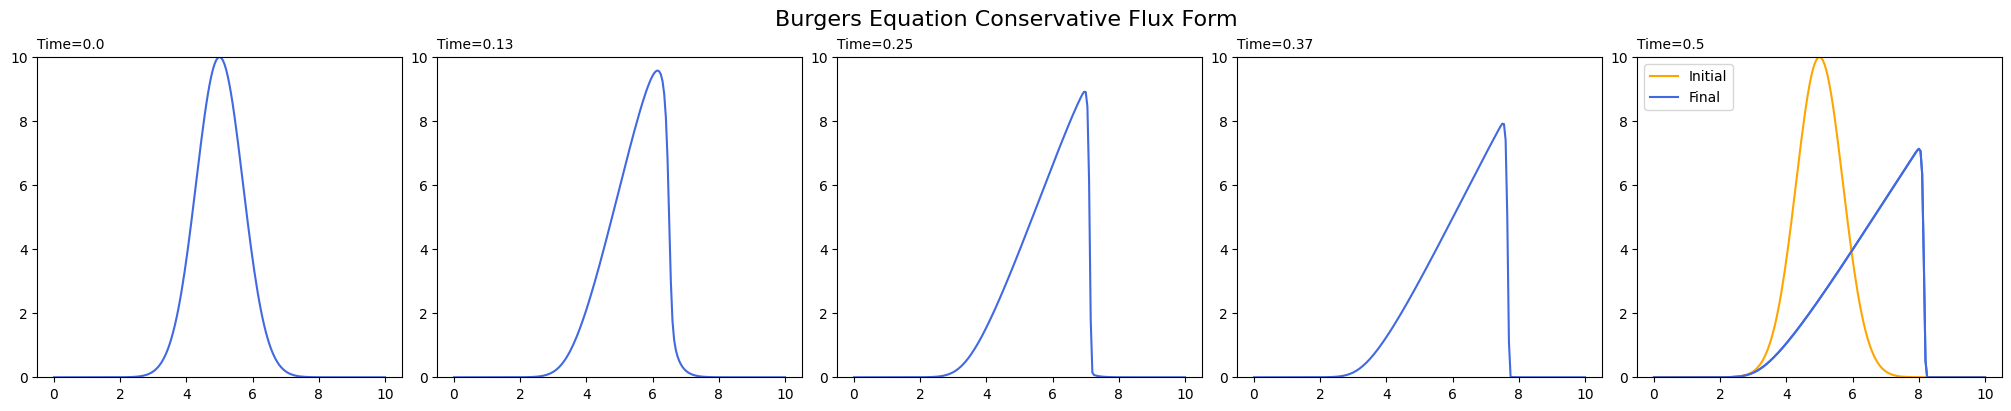

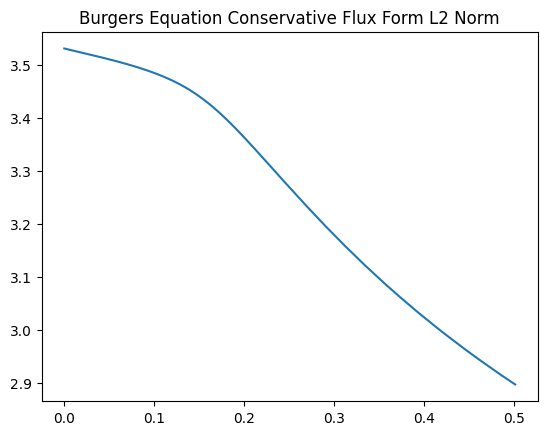

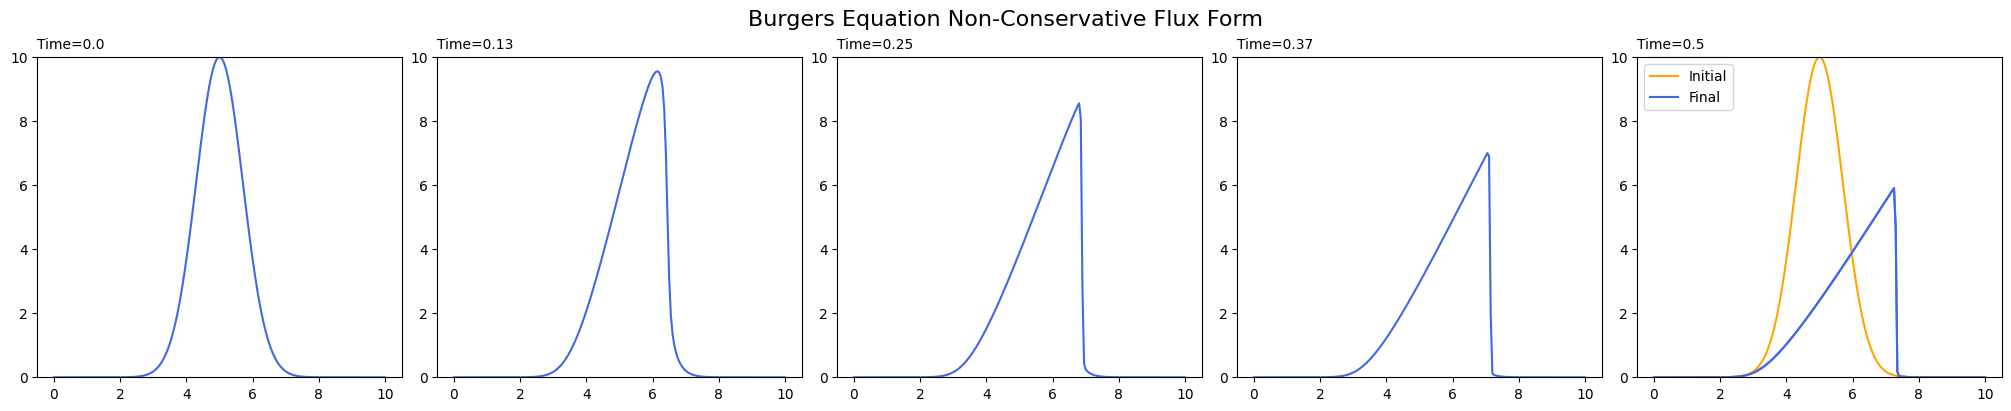

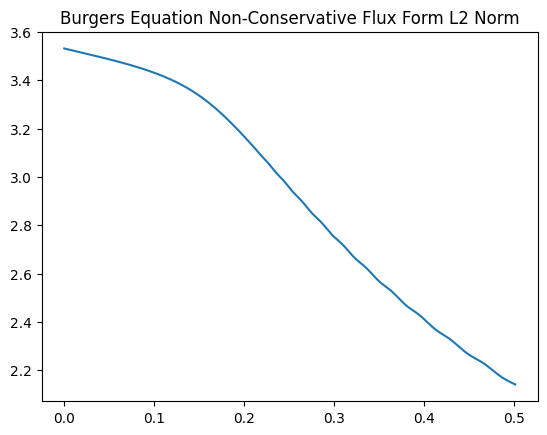

In [10]:
#Create directory where to save images

plotsave = []
timesave = []

#Number of snapshots steps to produce a figure with 5 panels. The first one is the initial state and the last one is the final state, distributed in between with even spacing
step_panels = round(t_final/(4 * dt), 0)

panels = 5

for key in flux:
    #Default path
    os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Burgers_Equation/')

    #New folder
    dir = './' + key

    #Enter new folder
    os.chdir(dir)

    #Reset Step
    l2norm.clear()
    time.clear()

    #Initial Conditions
    u_current = u_initial.copy()
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(0.0)

    plotsave.append(u_current)
    timesave.append('Time='+str(round(time[0],2)))

    #Initilize time and iteration counter
    t = 0.0
    i = 0

    #Save the initial conditions
    plt.plot(x, u_current)
    plt.title('Burgers Equation ' + key + ' Flux Form Time = ' + str(round(t, 2)))
    plt.ylim(0, 10)
    plt.savefig('fig_'+str(i).zfill(5)+'.png', dpi=200)
    plt.close()

    #Solve the advection equation
    while t < t_final:

            # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
            #       np.roll(u_current,  1) is equivalent to u(j-1)
            #       using np.roll is equivalent to use periodic boundary conditions

        if key == 'Conservative':           #Conservative Form
            u_next = u_current - (dt/dx) * (0.5 * (u_current**2) - 0.5 * (np.roll(u_current, 1)**2))

        elif key == 'Non-Conservative':     #Non-Conservative form
            u_next = u_current - (dt/dx) * u_current * (u_current - np.roll(u_current, 1))

        #Update the solution
        u_current = u_next.copy()
        
        #Advance the time 
        t += dt
        i += 1
        
        #Compute the l2 norm and add the time to the time vector
        l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
        time.append(t)
        
        #Plot the current result and save in an image every iteration
        plt.plot(x, u_current)
        plt.title('Burgers Equation ' + key + ' Flux Form Time = ' + str(round(t, 2)))
        plt.ylim(0, 10)
        plt.savefig('fig_' + str(i).zfill(5)+'.png', dpi=200)
        plt.close()


        if(i%step_panels == 0):
            plotsave.append(u_current)
            current_time = 'Time='+str(round(t,2))
            timesave.append(current_time)

    #Saving last position in case of non integer frame division
    plotsave[-1] = u_current
    timesave[-1] = 'Time='+str(round(time[-1],2))

    '''
    #Plot the final solution
    plt.plot(x, u_initial, label='Initial')
    plt.plot(x, u_current, label='Final')
    plt.title('Burgers Equation ' + key + ' Flux Form Time = ' + str(round(t, 2)))
    plt.ylim(0, 10)
    plt.legend()
    plt.show()
    '''

    #Movie Creation
    #Get the list of image files in the current directory
    files = os.listdir('./')

    #Sort the files in alphanumeric order
    files = sorted(files)

    os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Burgers_Equation/')

    with imageio.get_writer('./Movies/' + key + '.mp4', mode='I', fps=10) as writer:
        for file in files:
            current_image = imageio.imread('./' + key + '/' + file)
            writer.append_data(current_image)

    files = []


    #Evolution plots
    os.chdir('/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Burgers_Equation/')

    fig, ax = plt.subplots(figsize=(20, 4), layout='constrained')
    fig.suptitle('Burgers Equation ' + key + ' Flux Form', fontsize=16)
    for k in range(0, panels):
        plt.subplot(1, panels, k+1)
        plt.plot(x, plotsave[k], c='royalblue')

        if k == (panels-1):     #Visualizing initial vs last
            plt.plot(x, u_initial, label='Initial', c='orange')
            plt.plot(x, plotsave[k], label='Final', c='royalblue')
        
        plt.ylim(0, 10)
        plt.title(timesave[k], fontsize=10, loc='left')
    
    plt.legend(loc='upper left', fontsize=10)
    plt.savefig(key + 'burgersevolutionplot.png', dpi=400)
    plt.show()

    plotsave.clear()
    timesave.clear()

    #L2 Norm
    plt.plot(time, l2norm, c='C0')
    plt.title('Burgers Equation ' + key + ' Flux Form L2 Norm')
    plt.savefig('./L2_Norm_' + key + '.png', dpi=200)
    plt.show()